## Qual a relação do acesso à internet banda larga domiciliar , levando em consideração a renda per capita, nas áreas rurais e urbanas das regiões brasileiras?



In [156]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import zeros_like
import os 

In [157]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Ester Quintino\Documents\GitHub\CienciaDosDados


In [158]:
Documento = pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [159]:
#dados_não_nulos=dados_não_nulos.rename(columns={"V02322":"NetNoDomicílio","V4105":"SituaçãoCensitária","V4621":"RendaPercapita","V02426":"AcessoPorBandaLarga","UF":"UF"})


In [160]:
dados=pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados_resumidos=dados.loc[:,["V02322","V4105","V4621","V02426","UF"]]#.dropna(axis=0)
dados_resumidos.to_csv("resumo.csv")
dados_resumidos.head()


,V02322,V4105,V4621,V02426,UF
0,4.0,1,800.0,NaN,11
1,NaN,1,NaN,NaN,11
2,2.0,1,1150.0,2.0,11
3,2.0,1,793.0,2.0,11
4,4.0,1,2900.0,NaN,11


In [161]:
dados_não_nulos = dados_resumidos
dados_não_nulos.head()

,V02322,V4105,V4621,V02426,UF
0,4.0,1,800.0,NaN,11
1,NaN,1,NaN,NaN,11
2,2.0,1,1150.0,2.0,11
3,2.0,1,793.0,2.0,11
4,4.0,1,2900.0,NaN,11


In [162]:
#Mudanças categorias
dados_não_nulos.V02322=dados.V02322.astype('category')
dados_não_nulos.V02322.cat.categories=(["Sim","Não"])
dados_não_nulos.V02426=dados.V02322.astype('category')
dados_não_nulos.V02426.cat.categories=(["Sim","Não"])

dados_não_nulos.UF=dados.UF.astype('category')
dados_não_nulos.UF.cat.categories=(["Rondônia","Acre","Amazonas","Roraima","Pará","Amapá","Tocantins","Maranhão","Piauí","Ceará","Rio Grande do Norte","Paraíba","Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro","São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goías","Distrito Federal"])
dados_não_nulos.loc[(dados_não_nulos.UF=="Rondônia")|(dados_não_nulos.UF=="Acre")|(dados_não_nulos.UF=="Amazonas")|(dados_não_nulos.UF=="Roraima")|(dados_não_nulos.UF=="Pará")|(dados_não_nulos.UF=="Amapá")|(dados_não_nulos.UF=="Tocantins")|(dados_não_nulos.UF=="Maranhão")|(dados_não_nulos.UF=="Piauí")|(dados_não_nulos.UF=="Ceará")|(dados_não_nulos.UF=="Rio Grande do Norte")|(dados_não_nulos.UF=="Paraíba")|(dados_não_nulos.UF=="Pernambuco")|(dados_não_nulos.UF=="Alagoas")|(dados_não_nulos.UF=="Sergipe")|(dados_não_nulos.UF=="Bahia")|(dados_não_nulos.UF=="Minas Gerais")|(dados_não_nulos.UF=="Espírito Santo")|(dados_não_nulos.UF=="Rio de Janeiro")|(dados_não_nulos.UF=="São Paulo")|(dados_não_nulos.UF=="Paraná")|(dados_não_nulos.UF=="Santa Catarina")|(dados_não_nulos.UF=="Rio Grande do Sul")|(dados_não_nulos.UF=="Mato Grosso do Sul")|(dados_não_nulos.UF=="Mato Grosso")|(dados_não_nulos.UF=="Goiás")|(dados_não_nulos.UF=="Distrito Federal"),"Regiões"]="Brasil"
dados_não_nulos=dados_não_nulos.dropna(axis=0) #Dropna:Eliminação dos NAN's.
dados_não_nulos

dados_não_nulos.V4105=dados.V4105.astype('category')
dados_não_nulos.V4105.cat.categories = (["URBANA - Cidade ou vila, área urbanizada","URBANA - Cidade ou vila, área não urbanizada","URBANA - Área urbana isolada","RURAL - Aglomerado rural de extensão urbana ","RURAL - Aglomerado rural, isolado, povoado","RURAL - Aglomerado rural, isolado, núcleo","RURAL- Aglomerado rural, isolado, outros aglomerados", "RURAL - Zona rural exclusive aglomerado rural"])


C:\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [163]:
dados_não_nulos.loc[(dados_não_nulos.UF=='Rondônia') | (dados_não_nulos.UF=='Acre') | (dados_não_nulos.UF=='Amazonas') | (dados_não_nulos.UF=='Roraima') | (dados_não_nulos.UF=='Pará') | (dados_não_nulos.UF=='Amapá') | (dados_não_nulos.UF=='Tocantins'),'Regiao'] = 'Norte'
dados_não_nulos.loc[(dados_não_nulos.UF=='Maranhão') | (dados_não_nulos.UF=='Piaui') | (dados_não_nulos.UF=='Caerá') | (dados_não_nulos.UF=='Rio Grande do Norte') | (dados_não_nulos.UF=='Paraíba') | (dados_não_nulos.UF=='Pernambuco') | (dados_não_nulos.UF=='Alagoas') | (dados_não_nulos.UF=='Sergipe') | (dados_não_nulos.UF=='Bahia'),'Regiao'] = 'Nordeste'
dados_não_nulos.loc[(dados_não_nulos.UF=='Minas Gerais') | (dados_não_nulos.UF=='Espirito Santo') | (dados_não_nulos.UF=='Rio de Janeiro') | (dados_não_nulos.UF=='São Paulo'),'Regiao'] = 'Sudeste'
dados_não_nulos.loc[(dados_não_nulos.UF=='Paraná') | (dados_não_nulos.UF=='Santa Catarina') | (dados_não_nulos.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
dados_não_nulos.loc[(dados_não_nulos.UF=='Mato Grosso do Sul') | (dados_não_nulos.UF=='Mato Grosso') | (dados_não_nulos.UF=='Goiás') | (dados_não_nulos.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'
dados_não_nulos.head()

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,V02322,V4105,V4621,V02426,UF,Regiões,Regiao
0,Não,"URBANA - Cidade ou vila, área urbanizada",800.0,Não,Rondônia,Brasil,Norte
2,Sim,"URBANA - Cidade ou vila, área urbanizada",1150.0,Sim,Rondônia,Brasil,Norte
3,Sim,"URBANA - Cidade ou vila, área urbanizada",793.0,Sim,Rondônia,Brasil,Norte
4,Não,"URBANA - Cidade ou vila, área urbanizada",2900.0,Não,Rondônia,Brasil,Norte
5,Sim,"URBANA - Cidade ou vila, área urbanizada",1990.0,Sim,Rondônia,Brasil,Norte


In [164]:
dados_não_nulos=dados_não_nulos[dados_não_nulos['V4621']!=999999999999.0]
dados_não_nulos.head()


,V02322,V4105,V4621,V02426,UF,Regiões,Regiao
0,Não,"URBANA - Cidade ou vila, área urbanizada",800.0,Não,Rondônia,Brasil,Norte
2,Sim,"URBANA - Cidade ou vila, área urbanizada",1150.0,Sim,Rondônia,Brasil,Norte
3,Sim,"URBANA - Cidade ou vila, área urbanizada",793.0,Sim,Rondônia,Brasil,Norte
4,Não,"URBANA - Cidade ou vila, área urbanizada",2900.0,Não,Rondônia,Brasil,Norte
5,Sim,"URBANA - Cidade ou vila, área urbanizada",1990.0,Sim,Rondônia,Brasil,Norte


In [165]:
renda = dados_não_nulos.V4621
renda.describe()

count    110483.000000
mean       1253.139949
std        1979.311037
min           0.000000
25%         411.000000
50%         788.000000
75%        1329.000000
max      150000.000000
Name: V4621, dtype: float64

In [166]:
faixa = (0,937/4 ,937/2, 937, 937*2,2771.5)
rendarelativa = pd.cut(renda, faixa, False)
print('Frequências relativas:')
ut1 = (rendarelativa.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(ut1,'\n')

Frequências relativas:
[0.0, 234.25)       10.9
[234.25, 468.5)     20.5
[468.5, 937.0)      36.0
[937.0, 1874.0)     25.5
[1874.0, 2771.5)     7.2
Name: V4621, dtype: float64 



- Gráfico 1 - Relação entre Renda Percapita Domiciliar e Densidade
- Gráfico 2 - Relação entre Renda Percapita Domiciliar e  Frequência Relativa (dada em porcentagem)

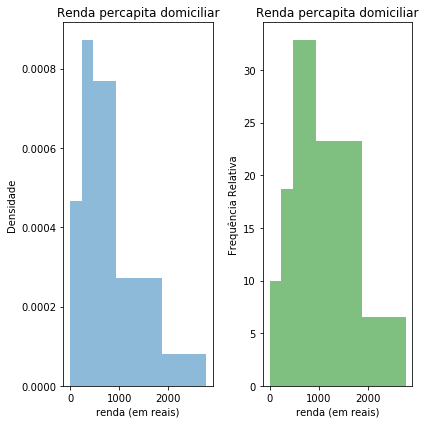

In [192]:
fig = plt.figure(figsize=(11, 5))
plt.subplot(121)
plot = renda.plot.hist(bins=faixa,title='Renda percapita domiciliar', figsize=(6, 6), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('renda (em reais)')

plt.subplot(122)
plot = renda.plot.hist(bins=faixa, title='Renda percapita domiciliar', weights=zeros_like(renda)+1./renda.size*100, figsize=(6, 6), color = ('g'), alpha=0.5)
plt.ylabel('Frequência Relativa')
plt.xlabel('renda (em reais)')

plt.tight_layout()
plt.show()

No gráfico 1, percebe-se que a densidade é maior em uma renda
entre 250-500 reais, aproximadamente. É possível notar ainda, que são poucas as pessoas que possuem renda entre 1800-2800 reais.

No gráfico 2 , é possível inferir que a maior parte das pessoas (aproximadamente 33 % do total), possuem entre 750-1000 reais
de renda percapita.

# Relação entre Renda Percapita Domiciliar e Região.

In [168]:
#Relação Renda Percapita Domiciliar e Região
renda_região=pd.crosstab( rendarelativa, dados_não_nulos.Regiao, margins=True, rownames=['Renda per capita domiciliar (em salários mínimos)'], colnames=['Região'], normalize=True)*100
renda_região=renda_região.round(decimals=1)
renda_região

Região,Centroeste,Nordeste,Norte,Sudeste,Sul,All
Renda per capita domiciliar (em salários mínimos),,,,,,
"[0.0, 234.25)",0.3,4.8,2.6,1.8,0.8,10.3
"[234.25, 468.5)",1.1,6.9,4.8,5.1,2.2,20.0
"[468.5, 937.0)",2.5,9.2,5.9,11.9,6.5,36.0
"[937.0, 1874.0)",2.2,4.0,3.1,10.2,6.8,26.3
"[1874.0, 2771.5)",0.8,1.0,0.8,2.9,2.0,7.4
All,6.9,25.9,17.2,31.8,18.2,100.0


Percebe-se então a seguinte relação em relação a renda percapita:
- 1º lugar: Sudeste , com 31.8 salários mínimos.
- 2º lugar: Nordeste, com 25.9 salários mínimos.
- 3º lugar: Sul, com 18.2 salários mínimos.
- 4º lugar: Norte, com 17.2 salários mínimos.
- 5ºlugar: Centroeste com 6.9 salários mínimos.


GRÁFICO ILUSTRATIVO DA RENDA PERCAPITA DOMICILIAR, EM RELAÇÃO À REGIÃO

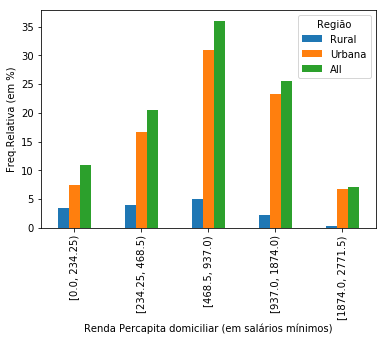

In [187]:
plot = renda_região[:-1].plot(kind='bar')
plt.ylabel('Freq.Relativa (em %)')

Com os dados, prevê que a região Rural possui uma renda percapita muito inferior a
região Urbana.

GRÁFICO DE DISPARIDADE: RELAÇÃO RENDA E REGIÃO

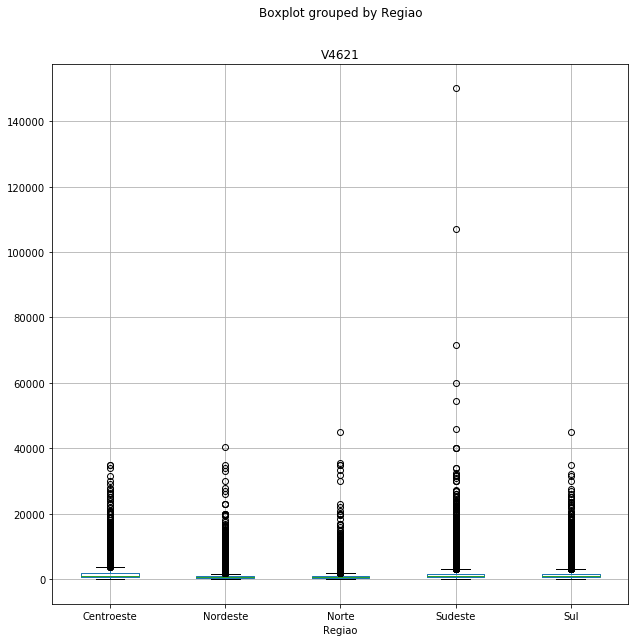

In [193]:
dados_não_nulos.boxplot(column="V4621",  by="Regiao", figsize=(10,10))

Constata-se que a Região Sudeste possui uma renda maior, embora com maiores disparidades, que as demais regiões.
Veja abaixo a relação de disparidade:

- 1º lugar: Centroeste, com menor disparidade.
- 2º lugar: Norte
- 3º lugar: Sul
- 4º lugar: Nordeste
- 5ºlugar: Sudeste, com maior disparidade

# Relação Acesso à Internet e Região

In [170]:
regiaointernet=pd.crosstab( dados_não_nulos.V02322,dados_não_nulos.Regiao, margins=True, rownames=['Acesso à Internet'], colnames=['Região'], normalize=True)*100
regiaointernet=regiaointernet.round(decimals=1)
regiaointernet

Região,Centroeste,Nordeste,Norte,Sudeste,Sul,All
Acesso à Internet,,,,,,
Sim,4.8,12.6,7.8,21.4,11.9,58.4
Não,2.7,12.1,8.6,11.3,7.0,41.6
All,7.5,24.7,16.4,32.6,18.8,100.0


É possível perceber que o Sudeste possui um número de acesso à
internet, muito grande , ocupando a posição 1 na classificação que
se segue:

- 1º lugar: Sudeste , com 21.4% SIM e 11.3% NÃO.
- 2º lugar: Nordeste, com 12.6% SIM e 12.1% NÃO .
- 3º lugar: Sul, com 11.9% SIM e 7% NÃO.
- 4º lugar: Norte, com 7.8% SIM e 8.6% NÃO.
- 5ºlugar: Centroeste com 4.8% SIM e 2.7% NÃO

Tal constatação , é mostrada no gráfico abaixo:

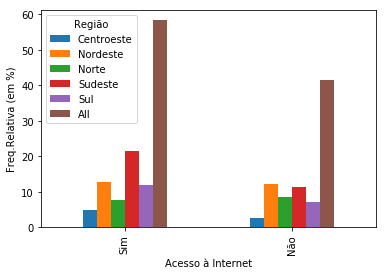

In [184]:
plot = regiaointernet[:-1].plot(kind='bar')
plt.ylabel('Freq.Relativa (em %)')

# Relação entre o acesso à Internet Banda Larga com a presença de  Internet no Domicílio

In [172]:
#Código Crosstab teste ,que relaciona Acesso a internet Banda Larga e Internet no Domicílio

BandaLargaDomi=pd.crosstab( dados_não_nulos.V02426,dados_não_nulos.V02322, margins=True, rownames=['Internet Banda Larga'], colnames=['Internet no Domicílio'], normalize=True)*100
BandaLargaDomi=BandaLargaDomi.round(decimals=1)
BandaLargaDomi



Internet no Domicílio,Sim,Não,All
Internet Banda Larga,,,
Sim,57.5,0.0,57.5
Não,0.0,42.5,42.5
All,57.5,42.5,100.0


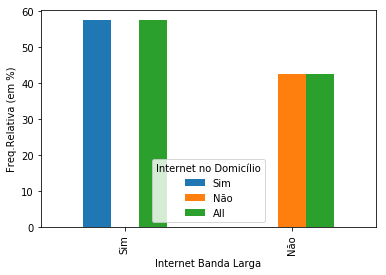

In [189]:
plot = BandaLargaDomi[:-1].plot(kind='bar')
plt.ylabel('Freq.Relativa (em %)')

Analisando os dados do gráfico, percebe-se que 57,5 por cento das pessoas possuem internet Banda Larga no Domicílio.

Logo em seguida tem uma relação entre Região e a presença de Internet Banda Larga no Domicílio 

In [174]:
#Código Crosstab teste ,que relaciona Acesso a internet Banda Larga / Internet no Domicílio e Renda

#AcessoRenda=pd.crosstab( BandaLargaDomi,renda_região, margins=True, rownames=['Internet Banda Larga'], colnames=['Renda por região'], normalize=True)*100
#AcessoRenda=AcessoRenda.round(decimals=1)
#AcessoRenda


In [175]:
#plot = AcessoRenda.plot(kind='bar')
#plt.ylabel('Freq.Relativa (em %)')

In [176]:
dados_não_nulos.loc[(dados_não_nulos.V02322=='Sim') | (dados_não_nulos.V02426=='Sim'), 'DomiciliarComBandaLarga'] = 'Sim'
dados_não_nulos.loc[(dados_não_nulos.V02322=='Não') & (dados_não_nulos.V02426=='Não'), 'DomiciliarComBandaLarga'] = 'Não'
dados_não_nulos.loc[(dados_não_nulos.V02322=='Sim') & (dados_não_nulos.V02426=='Não'), 'DomiciliarComBandaLarga'] = 'Não'
dados_não_nulos.loc[(dados_não_nulos.V02322=='Não') & (dados_não_nulos.V02426=='Sim'), 'DomiciliarComBandaLarga'] = 'Não'
dados_não_nulos.head()

,V02322,V4105,V4621,V02426,UF,Regiões,Regiao,DomiciliarComBandaLarga
0,Não,"URBANA - Cidade ou vila, área urbanizada",800.0,Não,Rondônia,Brasil,Norte,Não
2,Sim,"URBANA - Cidade ou vila, área urbanizada",1150.0,Sim,Rondônia,Brasil,Norte,Sim
3,Sim,"URBANA - Cidade ou vila, área urbanizada",793.0,Sim,Rondônia,Brasil,Norte,Sim
4,Não,"URBANA - Cidade ou vila, área urbanizada",2900.0,Não,Rondônia,Brasil,Norte,Não
5,Sim,"URBANA - Cidade ou vila, área urbanizada",1990.0,Sim,Rondônia,Brasil,Norte,Sim


Analisando a tabela, percebe-se que , das pessoas que possuem internet, cerca de 58.4 por cento possuem Banda Larga
Domiciliar, sendo o Sudeste, a região onde tem mais acesso.

Afim de ilustrar melhor essa comparação, foi realizado o seguinte
gráfico:

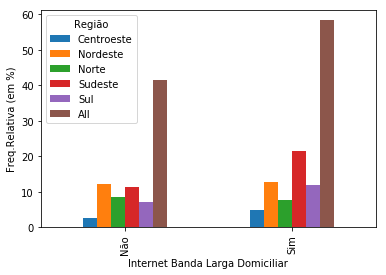

In [190]:
plot = BandaLargaDomiRegião[:-1].plot(kind='bar')
plt.ylabel('Freq.Relativa (em %)')

# Relação da Região (UF) com o Código de Situação Censitária.

Na minha análise, darei foco apenas a dois conceitos : Rural e Urbano.

In [179]:
#Código Crosstab teste ,que relaciona Região com Código de Situação Censitária


dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4105=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4105=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4105=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4105=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4105=="URBANA - Cidade ou vila, área urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'


dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4105=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4105=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4105=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4105=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4105=="URBANA - Cidade ou vila, área não urbanizada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'


dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4105=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4105=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] =  'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4105=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4105=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4105=="URBANA - Área urbana isolada"), 'RegiãoCondiçãoCensitária'] = 'Urbana'


dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural de extensão urbana "), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural, isolado, povoado"), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4105=="RURAL - Aglomerado rural, isolado, núcleo"), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4105=="RURAL- Aglomerado rural, isolado, outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4105=="RURAL- Aglomerado rural, isolado', outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4105=="RURAL- Aglomerado rural, isolado, outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4105=="RURAL- Aglomerado rural, isolado, outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4105=="RURAL- Aglomerado rural, isolado, outros aglomerados"), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.loc[(dados_não_nulos.UF=='Norte') | (dados_não_nulos.V4105=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Nordeste') | (dados_não_nulos.V4105=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sul') | (dados_não_nulos.V4105=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Sudeste') | (dados_não_nulos.V4105=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'
dados_não_nulos.loc[(dados_não_nulos.UF=='Centroeste') | (dados_não_nulos.V4105=="RURAL - Zona rural exclusive aglomerado rural"), 'RegiãoCondiçãoCensitária'] = 'Rural'

dados_não_nulos.head()







,V02322,V4105,V4621,V02426,UF,Regiões,Regiao,DomiciliarComBandaLarga,RegiãoCondiçãoCensitária
0,Não,"URBANA - Cidade ou vila, área urbanizada",800.0,Não,Rondônia,Brasil,Norte,Não,Urbana
2,Sim,"URBANA - Cidade ou vila, área urbanizada",1150.0,Sim,Rondônia,Brasil,Norte,Sim,Urbana
3,Sim,"URBANA - Cidade ou vila, área urbanizada",793.0,Sim,Rondônia,Brasil,Norte,Sim,Urbana
4,Não,"URBANA - Cidade ou vila, área urbanizada",2900.0,Não,Rondônia,Brasil,Norte,Não,Urbana
5,Sim,"URBANA - Cidade ou vila, área urbanizada",1990.0,Sim,Rondônia,Brasil,Norte,Sim,Urbana


GRÁFICO QUE RELACIONA O CÓDIGO DE SITUAÇÃO CENSITÁRIA E REGIÃO

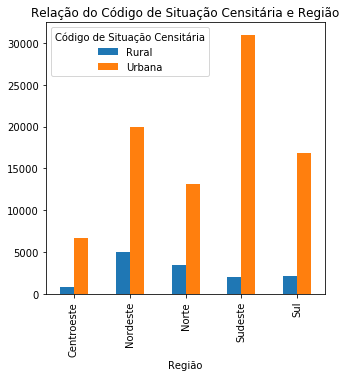

In [180]:
segurreg09=pd.crosstab(dados_não_nulos.Regiao,dados_não_nulos.RegiãoCondiçãoCensitária,rownames=['Região'],colnames=['Código de Situação Censitária'])
plot=segurreg09.plot(kind='bar',figsize=(5,5),legend=True)
plt.title('Relação do Código de Situação Censitária e Região')


Portanto, é possível afirmar que o :
- 1º lugar: É referente ao Sudeste , com , aproximadamente, 2500 Rural e 30000 Urbana.

- 2º lugar: É referente ao Nordeste, com , aproximadamente, 5000 Rural e 20000 Urbana.

- 3º lugar: É referente ao Sul, com , aproximadamente, 2500 Rural e 17000 Urbana.

- 4º lugar: É referente ao Norte, com , aproximadamente, 4000 Rural e 13.500 Urbana.

- 5ºlugar: É referente ao Centroeste, com , aproximadamente, 1000 Rural e 7000 Urbana.

# Relação entre Condição Censitária e Renda Percapita Domiciliar

In [182]:

renda_região=pd.crosstab( rendarelativa, dados_não_nulos.RegiãoCondiçãoCensitária, margins=True, rownames=['Renda Percapita domiciliar (em salários mínimos)'], colnames=['Região'], normalize=True)*100
renda_região=renda_região.round(decimals=1)
renda_região

Região,Rural,Urbana,All
Renda Percapita domiciliar (em salários mínimos),,,
"[0.0, 234.25)",3.5,7.4,10.9
"[234.25, 468.5)",3.9,16.6,20.5
"[468.5, 937.0)",5.1,30.9,36.0
"[937.0, 1874.0)",2.2,23.3,25.5
"[1874.0, 2771.5)",0.3,6.8,7.2
All,15.1,84.9,100.0


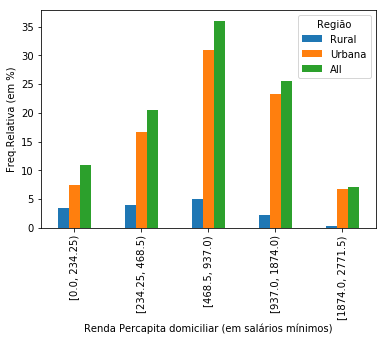

In [183]:
plot = renda_região[:-1].plot(kind='bar')
plt.ylabel('Freq.Relativa (em %)')

- Rural: 15.1 em salários mínimos
- Urbana: 84.9 em salários mínimos 


In [ ]:
#Banda larga fixa está presente em 35,53% dos domicílios do país, mostra Anatel


In [ ]:
Ao longo da elaboração do projeto, com a análise dos gráficos que foram plotados, e das tabelas realizadas,
percebe-se que a Região Sudeste se destacou no acesso à internet Banda Larga Domiciliar. E isso se deve principalmente,
pelo fato de possuir uma população com pessoas que tem renda percapita maior, que as demais regiões.


#A região com maior número de assinantes é a Sudeste (14 milhões), o que corresponde a 49,49%
#dos domicílios da região. Em São Paulo, onde 60,3% dos lares têm internet,
#há 8,85 milhões de assinantes. Na Região Sul, há 4 milhões de acessos ao serviço,
#o que coloca a internet de banda larga fixa em 40,24% dos lares.

#Na Região Norte, há 676.417 acessos ao serviço, presente em 14,15% dos lares. 
#No Nordeste, são 2,68 milhões de assinaturas – o correspondente a 15,75% dos lares. 
#Já na Região Centro-Oeste, o total de assinantes chega a 1,8 milhão (35,68% das residências).

#A unidade federativa que tem menor percentual de residências com esse tipo de internet é o Maranhão, onde 
#o serviço atende a apenas 8,63% dos lares, o correspondente a 164.012 assinaturas.
#Em penúltimo lugar está o Amapá, onde a banda fixa se faz presente em 9,37% das residências, 
#o que corresponde a 18.489 assinaturas.

#Pedro Peduzzi - Repórter da Agência Brasil